In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math

In [17]:
bike = pd.read_csv("bike-demand.csv")

In [18]:
bike.head(5)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
bike.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
bt = bike.copy()

In [22]:
bt = bt.drop(['index', 'casual', 'registered'], axis=1)

In [23]:
bt.isnull().sum()

date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

<Figure size 576x432 with 0 Axes>

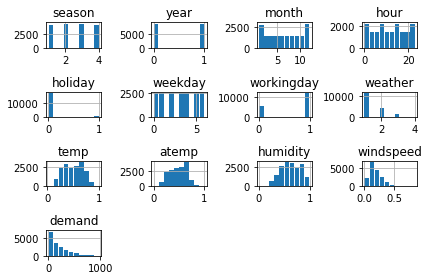

In [24]:
plt.figure(figsize=(8,6))
bt.hist(rwidth=0.9)
plt.tight_layout()

In [25]:
bt = bt.drop(['date'], axis=1)
bt.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


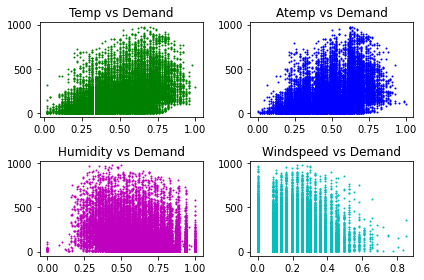

In [26]:
plt.subplot(2,2,1)
plt.title("Temp vs Demand")
plt.scatter(bt['temp'],bt['demand'],s=1,c='g')

plt.subplot(2,2,2)
plt.title("Atemp vs Demand")
plt.scatter(bt['atemp'],bt['demand'],s=1,c='b')

plt.subplot(2,2,3)
plt.title("Humidity vs Demand")
plt.scatter(bt['humidity'],bt['demand'],s=1,c='m')

plt.subplot(2,2,4)
plt.title("Windspeed vs Demand")
plt.scatter(bt['windspeed'],bt['demand'],s=1,c='c')

plt.tight_layout()

In [31]:
bt['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [32]:
bt['demand'].quantile([0.5,0.1,0.15,0.9,0.95,0.99])

0.50    142.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [33]:
correlation = bt[['temp','atemp','humidity','windspeed','demand']].corr()
print(correlation)

               temp     atemp  humidity  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


In [34]:
bt=bt.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)
print(bt)

       season  month  hour  holiday  weather  temp  humidity  demand
0           1      1     0        0        1  0.24      0.81      16
1           1      1     1        0        1  0.22      0.80      40
2           1      1     2        0        1  0.22      0.80      32
3           1      1     3        0        1  0.24      0.75      13
4           1      1     4        0        1  0.24      0.75       1
...       ...    ...   ...      ...      ...   ...       ...     ...
17374       1     12    19        0        2  0.26      0.60     119
17375       1     12    20        0        2  0.26      0.60      89
17376       1     12    21        0        1  0.26      0.60      90
17377       1     12    22        0        1  0.26      0.56      61
17378       1     12    23        0        1  0.26      0.65      49

[17379 rows x 8 columns]


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x71f21b751a00>)

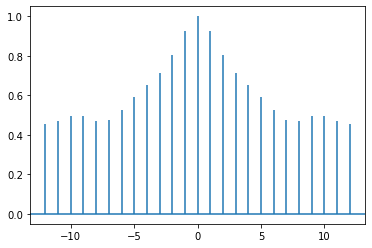

In [35]:
df1=pd.to_numeric(bt['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

<AxesSubplot:>

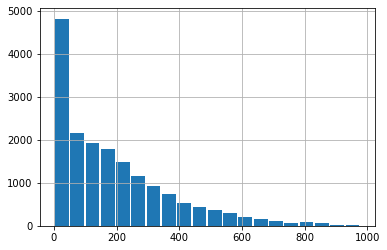

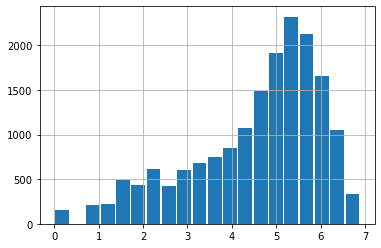

In [36]:
lf1=bt['demand']
lf2=np.log(lf1)

plt.figure()
lf1.hist(rwidth=0.9,bins=20)

plt.figure()
lf2.hist(rwidth=0.9,bins=20)

In [37]:
bt['demand']=np.log(bt['demand'])
print(bt)

       season  month  hour  holiday  weather  temp  humidity    demand
0           1      1     0        0        1  0.24      0.81  2.772589
1           1      1     1        0        1  0.22      0.80  3.688879
2           1      1     2        0        1  0.22      0.80  3.465736
3           1      1     3        0        1  0.24      0.75  2.564949
4           1      1     4        0        1  0.24      0.75  0.000000
...       ...    ...   ...      ...      ...   ...       ...       ...
17374       1     12    19        0        2  0.26      0.60  4.779123
17375       1     12    20        0        2  0.26      0.60  4.488636
17376       1     12    21        0        1  0.26      0.60  4.499810
17377       1     12    22        0        1  0.26      0.56  4.110874
17378       1     12    23        0        1  0.26      0.65  3.891820

[17379 rows x 8 columns]


In [38]:
t_1=bt['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

t_2=bt['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

t_3=bt['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

bt_lag=pd.concat([bt,t_1,t_2,t_3],axis=1)
print(bt_lag)

       season  month  hour  holiday  weather  temp  humidity    demand  \
0           1      1     0        0        1  0.24      0.81  2.772589   
1           1      1     1        0        1  0.22      0.80  3.688879   
2           1      1     2        0        1  0.22      0.80  3.465736   
3           1      1     3        0        1  0.24      0.75  2.564949   
4           1      1     4        0        1  0.24      0.75  0.000000   
...       ...    ...   ...      ...      ...   ...       ...       ...   
17374       1     12    19        0        2  0.26      0.60  4.779123   
17375       1     12    20        0        2  0.26      0.60  4.488636   
17376       1     12    21        0        1  0.26      0.60  4.499810   
17377       1     12    22        0        1  0.26      0.56  4.110874   
17378       1     12    23        0        1  0.26      0.65  3.891820   

            t-1       t-2       t-3  
0           NaN       NaN       NaN  
1      2.772589       NaN       NaN

In [39]:
bt_lag=bt_lag.dropna()

In [40]:
print(bt_lag)

       season  month  hour  holiday  weather  temp  humidity    demand  \
3           1      1     3        0        1  0.24      0.75  2.564949   
4           1      1     4        0        1  0.24      0.75  0.000000   
5           1      1     5        0        2  0.24      0.75  0.000000   
6           1      1     6        0        1  0.22      0.80  0.693147   
7           1      1     7        0        1  0.20      0.86  1.098612   
...       ...    ...   ...      ...      ...   ...       ...       ...   
17374       1     12    19        0        2  0.26      0.60  4.779123   
17375       1     12    20        0        2  0.26      0.60  4.488636   
17376       1     12    21        0        1  0.26      0.60  4.499810   
17377       1     12    22        0        1  0.26      0.56  4.110874   
17378       1     12    23        0        1  0.26      0.65  3.891820   

            t-1       t-2       t-3  
3      3.465736  3.688879  2.772589  
4      2.564949  3.465736  3.688879

In [41]:
bt_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [42]:
bt_lag['season']=bt_lag['season'].astype('category')
bt_lag['month']=bt_lag['month'].astype('category')
bt_lag['hour']=bt_lag['hour'].astype('category')
bt_lag['holiday']=bt_lag['holiday'].astype('category')
bt_lag['weather']=bt_lag['weather'].astype('category')

bt_lag=pd.get_dummies(bt_lag,drop_first=True)

In [44]:
bt_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y=bt_lag[['demand']]
X=bt_lag.drop(['demand'],axis=1)

In [46]:
X.head()

,temp,humidity,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,3.465736,3.688879,2.772589,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,2.564949,3.465736,3.688879,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,2.564949,3.465736,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.000000,0.000000,2.564949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,0.693147,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
tr_size=0.7*len(X)
print(tr_size)

12163.199999999999


In [48]:
tr_size=int(tr_size)
print(tr_size)

12163


In [49]:
x_train=X.values[0:tr_size]
x_test=X.values[tr_size:len(X)]

y_train=Y.values[0:tr_size]
y_test=Y.values[tr_size:len(Y)]

In [50]:
from sklearn.linear_model import LinearRegression
std_reg=LinearRegression()
std_reg.fit(x_train,y_train)

LinearRegression()

In [51]:
r2_train=std_reg.score(x_train,y_train)
r2_test=std_reg.score(x_test,y_test)

In [52]:
Y_predict=std_reg.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test,Y_predict))

In [54]:
print(r2_train)
print(r2_test)
print(rmse)

0.9195240591465778
0.9287151360253385
0.38098800498170465


In [55]:
y_test_e=[]
y_predict_e=[]

for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(Y_predict[i]))

In [56]:
log_sq_sum=0.0

for i in range(0,len(y_test)):
    log_a=math.log(y_test_e[i]+1)
    log_p=math.log(y_predict_e[i]+1)
    log_diff=(log_p-log_a)**2
    log_sq_sum=log_sq_sum+log_diff
    
rmsle=math.sqrt(log_sq_sum/len(y_test))
print(rmsle)

0.35609417069802113
